In [3]:
import streamlit as st
import google.generativeai as genai
from dotenv import load_dotenv
import os

import urllib
import warnings
from pathlib import Path as p
import pandas as pd
from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings

warnings.filterwarnings("ignore")

load_dotenv()
genai.configure(api_key=os.environ.get("GOOGLE_API_KEY"))

/Users/ganeshjadhav/miniconda3/envs/auto-gpt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# from IPython.display import display
# from IPython.display import Markdown
# import textwrap
# from pprint import pprint

True

In [4]:
# load model
model = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0.3)

# load pdf                            
pdf_loader = PyPDFLoader("test_accounts.pdf")
pages = pdf_loader.load_and_split()
context = "\n".join(str(p.page_content) for p in pages)
print("The total words in the context: ", len(context))

# promt
prompt_template = """Answer the question as precise as possible using the provided context. If the answer is
                    not contained in the context, say "answer not available in context" \n\n
                    Context: \n {context}?\n
                    Question: \n {question} \n
                    Answer:
                  """

prompt = PromptTemplate(
    template=prompt_template, input_variables=["context", "question"]
)

The total words in the context:  47129


In [9]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=0)
context = "\n\n".join(str(p.page_content) for p in pages)
texts = text_splitter.split_text(context)

embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
vector_index = Chroma.from_texts(texts, embeddings).as_retriever()

In [48]:
def ask_question(que):
    docs = vector_index.get_relevant_documents(que)
    stuff_chain = load_qa_chain(model, chain_type="stuff", prompt=prompt)

    stuff_answer = stuff_chain(
    {"input_documents": docs, "question": question}, return_only_outputs=True
    )
    return stuff_answer['output_text']


# TESTING:

In [50]:
from IPython.display import Image, display

## que 1

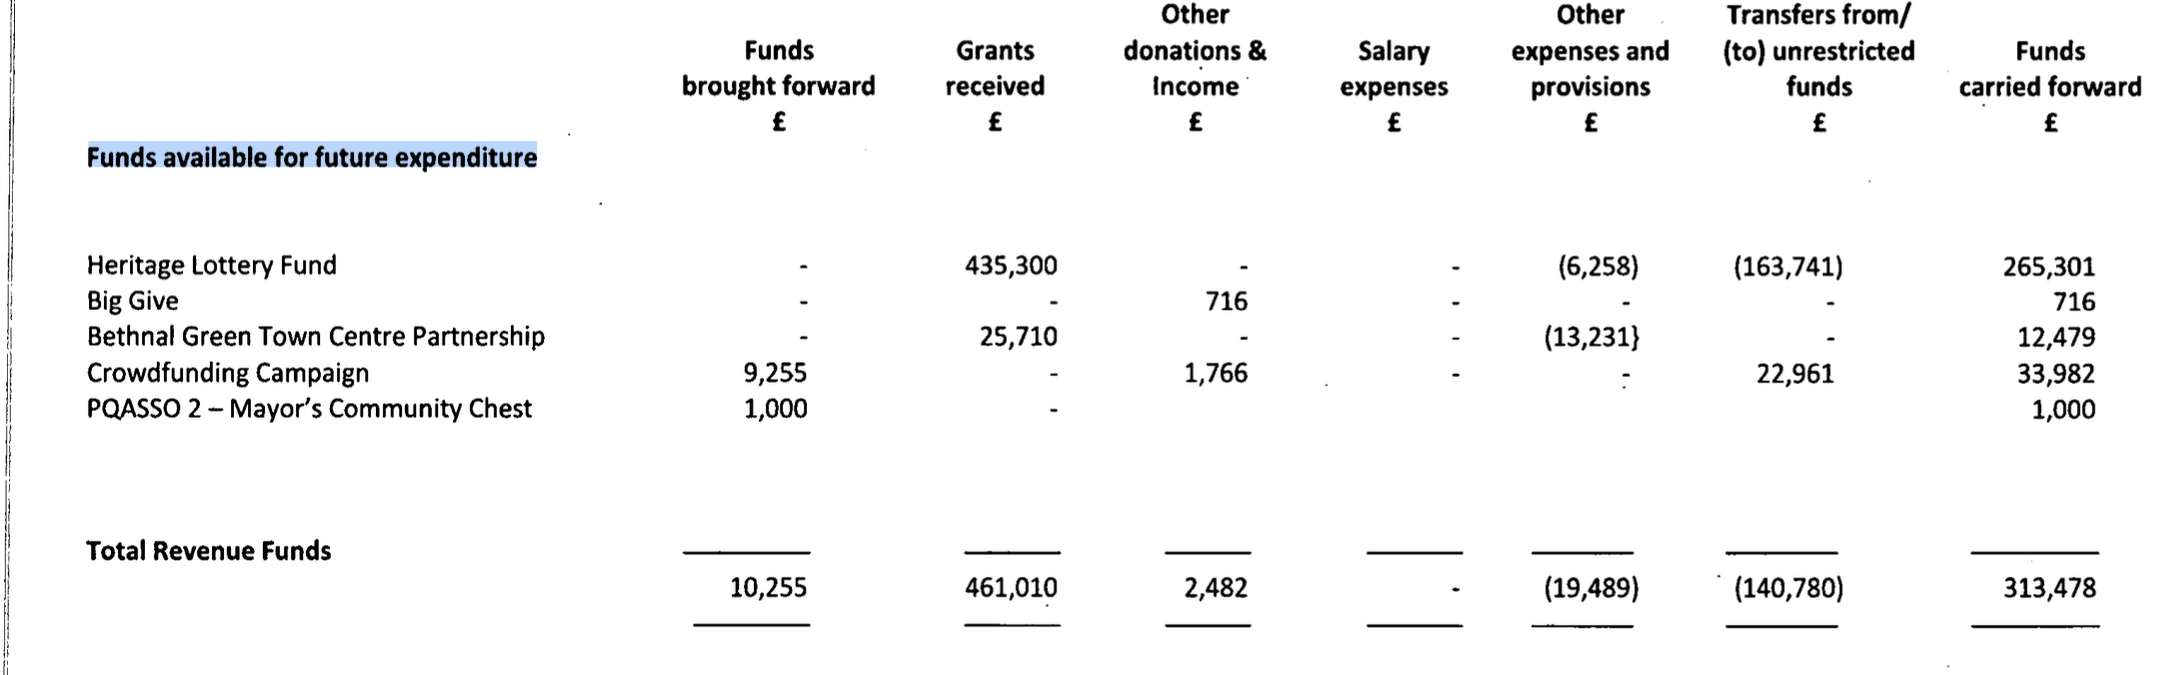

The funds available for future expenditure are as follows:

Heritage Lottery Fund: £265,301
BigGive: £716
Bethnal Green Town Centre Partnership: £12,479
Crowdfunding Campaign: £33,982
PQASSO 2-Mayor’s Community Chest: £1,000

Total: £313,478


In [52]:
image_path = 'img/que1.png'
display(Image(filename=image_path))

question = "give me summary of Funds available for future expenditure"
answer = ask_question(question)
print("Question:")
print(question)
print("Answer:")
print(answer)

In [53]:
question = "give me information about fixed assets"
answer = ask_question(question)
print(answer)

Fixed assets include freehold property, freehold improvements, and fixtures, fittings, and equipment. The freehold property is valued at £50,000, the freehold improvements are valued at £2,326,228, and the fixtures, fittings, and equipment are valued at £175,980, for a total of £2,552,208. The accumulated depreciation on these assets is £908,592, resulting in a net book value of £1,643,616.
